# Analysis of Pharmaceutical Sales Figures by Month and Forecasts for the Future

## Login
Since the concept of Artificial Intelligence emerged in the 1950s, data has become very important to us. Because this concept, which we call Artificial Intelligence, makes a generalized representation of the data. With the popularity of Artificial Neural Networks, data has become much more important because these structures are data monsters. In this project, we will not go into Artificial Neural Networks much, but we wanted to show the foundation that brought us to today.

In this project, we will first examine and clean a dataset containing the drug sales figures for the years 2014-2019, and then interpret this consistent data through visualization. After all this, we will extract some models from this data through Machine Learning methods, make predictions for the future with these models and interpret these predictions.

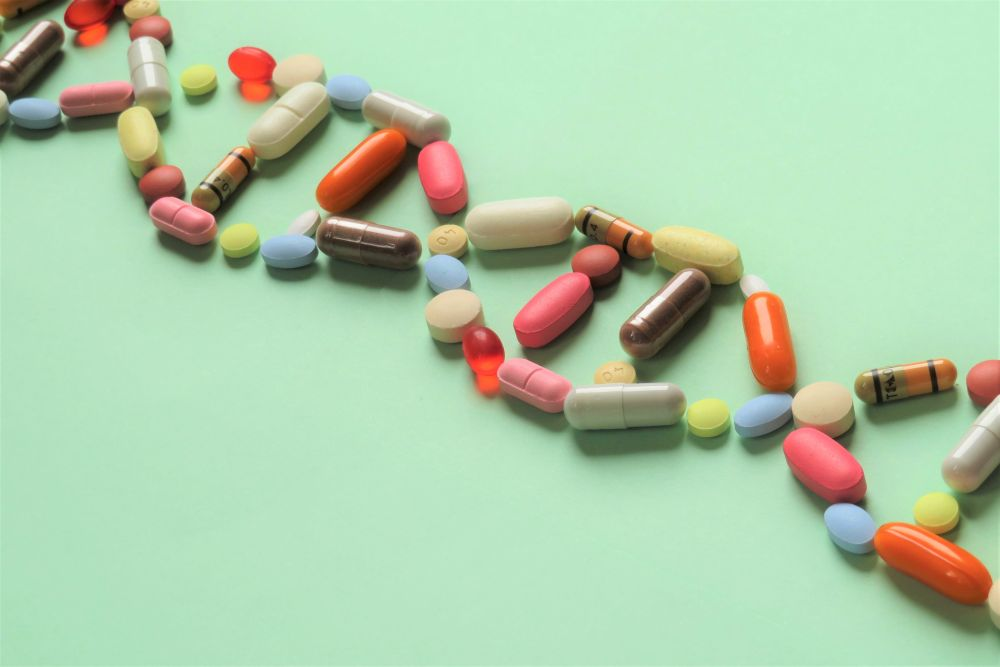

## Contents

1. Python Libraries
2. Data Content
3. Reading the Data and a General Analysis
4. Arrangement of Columns for Data Analysis by Months and Years
5. Detailed examination and analysis of data

<a id='1' ></a>
## Python Libraries

In this section, the python libraries and dataset that will be used throughout this project are imported.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings 
warnings.filterwarnings('ignore')


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id='2' ></a>
## Data Content

   * There is a total of 600,000 sales networks in the data, covering 6-year periods. There are 57 types of drugs in total in the dataset. These drugs have been collected in 8 categories with the Anatomical and Therapeutic Chemical Classification system.

These categories are:

   * M01AB: Anti-inflammatory drugs that reduce inflammation and edema, slow down the progression of the disease (antiheumatic), pain relievers / fever reducers (Non Steroidal Anti-inflammatory Drugs) and Acetic Acid derivatives.
   * M01AE: Anti-inflammatory drugs that reduce inflammation and edema, slow the progression of the disease (antiheumatic), pain relievers / fever reducers (Non Steroidal Anti-Inflammatory Drugs) and Propionic Acid derivative drugs.
   * N02BA: Analgesics and antipyretics, salicylic acid and derivatives.
   * N02BE/B: Analgesics and antipyretics, Pyrazolones and Anilides.
   * N05B: Psycholeptic drugs, Anxiolytic drugs
   * N05C - Psycholeptic drugs, Hypnotics and sedatives.
   * R03 - Medicines for obstructive airway diseases.
   * R06 - Antihistamines drugs for systemic use.

* In this dataset, monthly sales figures for these drug groups are available. According to these sales figures, first investigations will be made, and then Machine Learning models that can make predictions for the coming months will be developed.

<a id='3' ></a>
## Reading the Data and a General Analysis

 * First of all, do we need to clean the data by importing our dataset and making a general examination? We will look for an answer.

In [2]:
df_monthly = pd.read_csv("salesmonthly.csv")
df_monthly.head(5)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


* As seen above, there are monthly sales and sales dates for 8 different drug categories in our dataset.



In [3]:
df_monthly.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,149.992000,116.514286,115.020843,892.542071,262.118571,17.842857,167.675000,86.662571
std,31.485325,27.889336,31.245899,338.843908,85.060930,8.481242,81.767979,45.859336
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,137.490000,103.518250,94.375000,648.187500,223.750000,12.000000,112.000000,49.875000
50%,154.635000,114.840000,117.225000,865.824500,250.300000,18.000000,160.000000,74.100000
75%,169.000000,128.359750,133.837500,1061.580000,293.650000,23.000000,218.250000,119.807500
max,211.130000,222.351000,191.600000,1856.815000,492.000000,50.000000,386.000000,213.040000


* In the table above, we see the statistical status of our data in a simple way. Here is the part we need to pay attention to;
* First of all, the average values ​​of the classes and 50% values ​​should be close to each other. This is because we want to avoid skewness. The situation that causes this skewness is the data we call outlier. For good analysis and model training, we need to get rid of them. Looking at the table of our data, we can say that it is generally healthy. But there seems to be some data we need to clean up. Examples are NO2BE and R06.

In [4]:
# information about data
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   70 non-null     object 
 1   M01AB   70 non-null     float64
 2   M01AE   70 non-null     float64
 3   N02BA   70 non-null     float64
 4   N02BE   70 non-null     float64
 5   N05B    70 non-null     float64
 6   N05C    70 non-null     float64
 7   R03     70 non-null     float64
 8   R06     70 non-null     float64
dtypes: float64(8), object(1)
memory usage: 5.0+ KB


* When we examine the information table of our guardianship in a simple way, we cannot see any troublesome data. It is seen in a way that every cell is filled with data. But there is a possibility that the empty cells may be filled with the value 0, so we will have to check it. In addition, the types of data in our dataset are also in float type, exactly as we expected.

In [5]:
# If there are zero-valued rows, we need to discard them.
for col in df_monthly.columns:
    df_monthly = df_monthly[df_monthly[col] != 0]
df_monthly = df_monthly.reset_index(drop=True)

In [6]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   69 non-null     object 
 1   M01AB   69 non-null     float64
 2   M01AE   69 non-null     float64
 3   N02BA   69 non-null     float64
 4   N02BE   69 non-null     float64
 5   N05B    69 non-null     float64
 6   N05C    69 non-null     float64
 7   R03     69 non-null     float64
 8   R06     69 non-null     float64
dtypes: float64(8), object(1)
memory usage: 5.0+ KB


In [7]:
df_monthly.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,152.165797,118.202899,116.687812,905.477464,265.902899,18.101449,170.105072,87.918551
std,25.889420,24.222290,28.165372,323.448143,79.526993,8.260724,79.780194,44.966193
min,44.370000,37.300000,20.650000,295.150000,86.000000,5.000000,37.000000,11.130000
25%,137.640000,103.522000,97.000000,649.800000,226.000000,12.000000,112.000000,51.000000
50%,154.750000,114.961000,117.750000,867.899000,250.600000,18.000000,161.000000,74.500000
75%,169.320000,128.402000,133.850000,1062.686000,295.200000,23.000000,219.000000,120.800000
max,211.130000,222.351000,191.600000,1856.815000,492.000000,50.000000,386.000000,213.040000


* Above, we did the process of removing the erroneous rows consisting of zeros from the dataset by means of a piece of code, as a result of this process, we determined that 1 row was really incorrect and we made our data healthier, so the model we will train will give better results.

# <a id='4' ></a>
### Arrangement of Columns for Data Analysis by Months and Years

* First of all, the year and month information are at the beginning of the categories that are necessary for us for this project. In this dataset, the information we want is given in a single column (datum). Since this situation will cause difficulties in terms of analysis and coding, we divide this category into two columns as month and year.

In [10]:
# We added the months directly to our dataset as a new column of string type in order to be able to analyze it more meaningfully. 
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df_monthly["Month"] = 0
df_monthly["Year"] = "0"
for i, line in enumerate(df_monthly["datum"]):
    df_monthly["Month"][i] = months[int(line.split("-")[1]) - 1]
    df_monthly["Year"][i] = str(line.split("-")[0])
df_monthly.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Month,Year
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2,January,2014
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2,February,2014
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4,March,2014
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7,April,2014
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7,May,2014


* Now that I have the months as a new column, we discard the datum information that I do not need for this project.

In [11]:
df_monthly.drop(["datum"], inplace=True, axis=1)
df_monthly.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Month,Year
0,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2,January,2014
1,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2,February,2014
2,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4,March,2014
3,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7,April,2014
4,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7,May,2014


<a id='5' ></a>
## Outlier Control

* In this section, we will check for outliers, which is very important for model training and data analysis. These values ​​are important for us because they can undermine the sound analysis of the data and the estimation of the models.

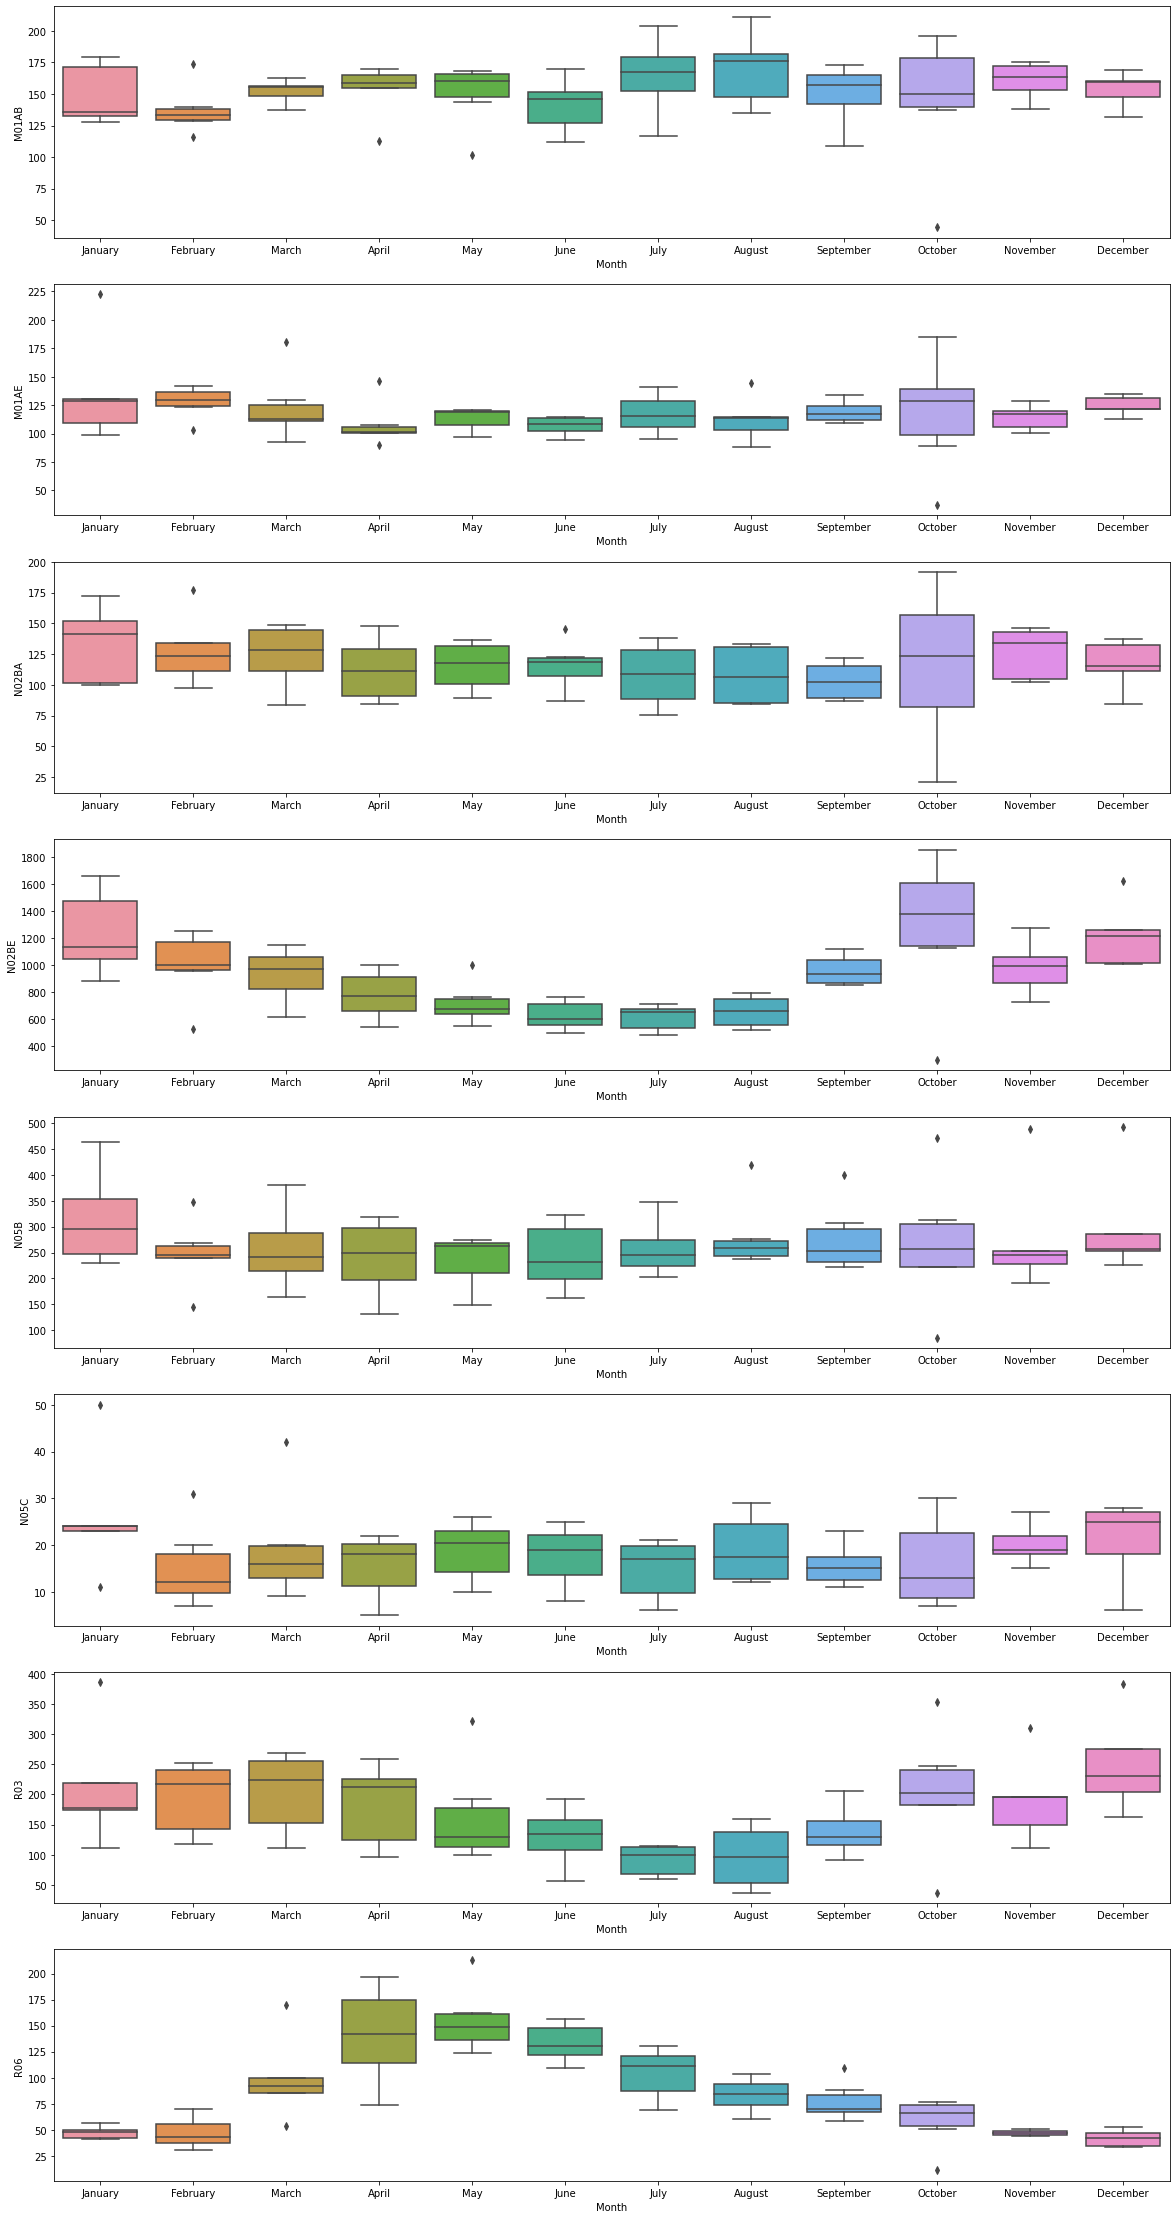

In [12]:
# We plot our data for outlier analysis.
fig, axes = plt.subplots(8, 1, figsize=(20, 40))
for name, ax in zip(['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06'], axes):
    sns.boxplot(data=df_monthly, x="Month", y=name, ax=ax)

* When the drug sales figures for the above months are examined, outliers that appear as dots stand out. Some of these values ​​need to be discarded.
* In addition, what catches our eye from the graphic as preliminary information is that this data is mostly suitable for analysis and model training.

In [13]:
# We will pull out and examine our outliers in the form of a table
def detect_outliers(df, features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)     
        # 3rd quartile
        Q3 = np.percentile(df[c],75)  
        # IQR
        IQR = Q3 - Q1
        # outlier step
        outlier_step = IQR * 2.75
        # detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items())
    
    return multiple_outliers

In [14]:
categories = ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']
df_monthly.loc[detect_outliers(df_monthly,categories)]

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Month,Year
68,44.37,37.300,20.650,295.150,86.0,7.0,37.0,11.13,October,2019
59,179.70,222.351,99.700,1660.612,295.2,23.0,386.0,41.30,January,2019
10,138.08,100.860,142.700,723.800,489.0,19.0,112.0,45.20,November,2014
11,131.90,121.401,111.124,1015.660,492.0,25.0,163.0,33.40,December,2014


In [15]:
# Outliers found will be discarded from our dataset.
df_monthly = df_monthly.drop(detect_outliers(df_monthly,categories),axis=0).reset_index(drop=True)

* Although it is very important for us to remove outliers from the data, there is a plus and minus situation here because we have a small number of data on an entry basis and each of these data is very important for us, so we can't give up on them easily. For this reason, we have eliminated outliers from our data that could cause serious problems in the analysis and model.

<a id='5' ></a>
## Detailed examination and analysis of data

   * In this section, a number of data visualization techniques were used to facilitate the analysis of monthly drug sales figures by years. The technique called Relplot, which makes numerical analysis-biased relational drawing, was used and the years were represented from the past to the present (2014-2019) from pale to dark tones.
    
   * In addition, the correlation graph, which occupies a very important place in data analysis, was also used. This chart contains important information for us at the point of bilateral relations between categories. With this information, it makes it easy for us to make interpretations about the proximity or distance in sales volumes between different categories. It also gives us a lot of information about the tendency of this dataset to make predictions in model training.

### Monthly Sales Figures of M01AB Pharmaceutical Category by Years

* **M01AB drug Class:** Anti-inflammatory drugs that reduce inflammation and edema, slow down the progression of the disease (antiheumatic), pain relievers / fever reducers (Non Steroidal Anti-inflammatory Drugs) and Acetic Acid derivative drugs.

* This type of drug is mostly used against injury and inflammation. It is also used in treatments that reduce the process and duration of pain with milder symptoms.

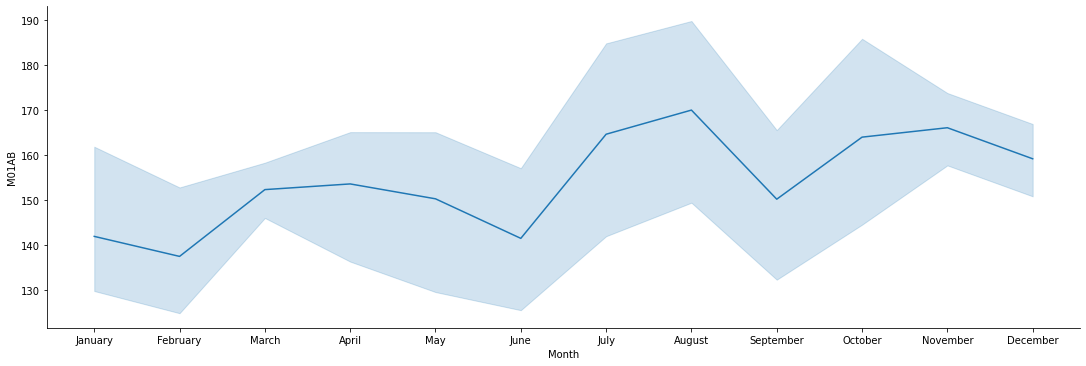

In [16]:
sns.relplot(kind='line', data=df_monthly, x='Month', y='M01AB', palette="flare", aspect=3) 

   
   If we examine the graph in general, an increase was observed in the sales figures in the summer months compared to other months. The reasons for this are interpreted below;
        
        With the warming of the weather, a great increase is observed in injuries with the increase of the chance of people to be active in nature and in open environments without protective clothing due to the air temperature.
        
        If the sales are analyzed according to the years, the seasonal changes fluctuate in a similar way.

### Monthly Sales Figures of M01AE Pharmaceutical Category by Years

* **M01AE:** Drugs that reduce inflammation and edema (Anti-inflammatory), slow down the progression of the disease (antiheumatic), pain reliever / fever reducer (Non Steroidal Anti-Inflammatory Drugs) and Propionic Acid derivatives.

* A group of non-narcotic pain relievers with analgesic, antipyretic and anti-inflammatory or relieving effects.

Source: https://nedir.ileilgili.org/propiyonik+asit+t%C3%BCrevleri

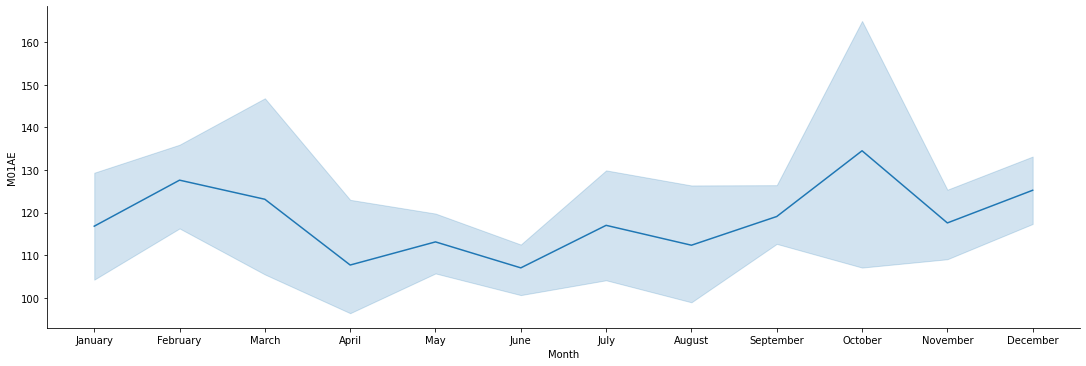

In [17]:
sns.relplot(kind='line', data=df_monthly, x='Month', y='M01AE', palette="flare", aspect=3)

* If we examine the graph in general, this type of drug is in the category of drugs used in more seasonal transition processes. Since this drug group mostly includes drugs used as antipyretic, cold and pain reliever, an increase in sales is observed in colder months.

### Monthly Sales Figures of N02BA Pharmaceutical Category by Years

* **N02BA:** Salicylic acid and its derivatives used as analgesics and antipyretics.

* Analgesic or painkiller is the name given to any drug used to relieve pain and cause analgesia (pain loss).

* Analgesic drugs act on the peripheral and central nervous system. They differ from anesthetics that affect temporarily and in some cases completely eliminate sensation.

Source: https://tr.wikipedia.org/wiki/A%C4%9Fr%C4%B1_kesici

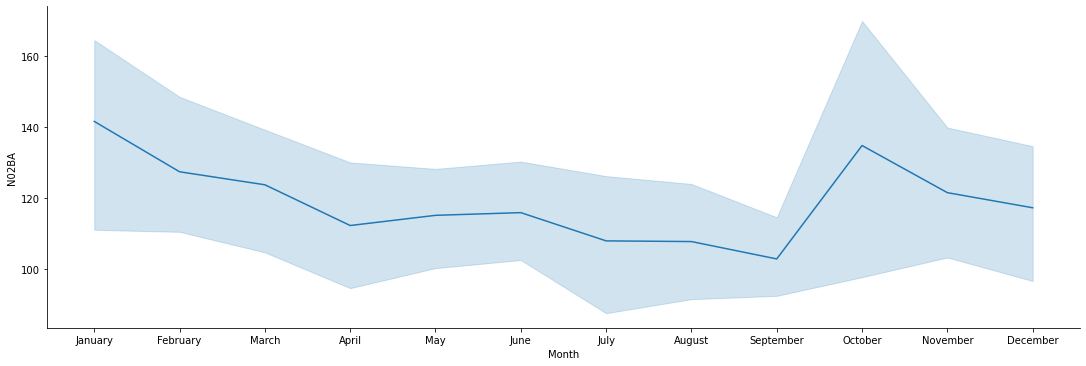

In [18]:
sns.relplot(kind='line', data=df_monthly, x='Month', y='N02BA', palette="flare", aspect=3)

* If I examine the graphic in general, it is similar to the M01AE drug group. If you need to interpret the reason for this:
 
 * Since these two drug groups offer similar solutions to problems with common symptoms, sales figures follow a similar schedule.

### Monthly Sales Figures of N02BE Pharmaceutical Category by Years

* **N02BE/B:** Analgesics and antipyretics, Pyrazolones and Anilides.

* Asprin and Novalgin type are non-prescription drugs used for mild temporary problems.

* As an example; Metamizole (or generically Novalgin® or Novalgin®; in veterinary preparations often Novamizol®) is a commonly used and over-the-counter pain reliever and fever reducer. It is usually administered in the form of metamizole sodium salt. In addition to its analgesic, spasmolytic, antirheumatic and antipyretic effects, metamizole also has an anti-inflammatory effect as it reduces the exudation in the inflamed area by reducing the vascular permeability and ensures rapid absorption of the liquid content.

Source: https://tr.wikipedia.org/wiki/Metamizol

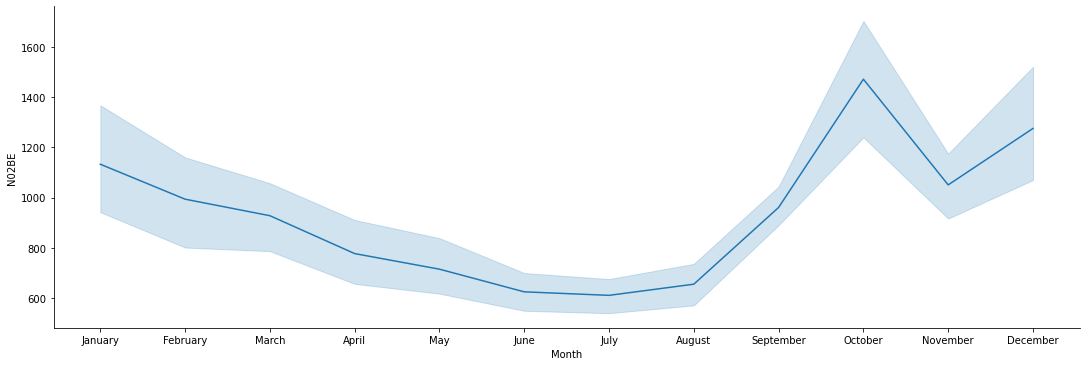

In [19]:
sns.relplot(kind='line', data=df_monthly, x='Month', y='N02BE', palette="flare", aspect=3)

* This drug group includes solutions for similar problems with the M01AB and N02BA drug groups. As seen in the table, a significant increase is observed in autumn and winter seasons compared to other seasons. 

### Monthly Sales Figures of N05B Pharmaceutical Category by Years

* **N05B:** Psycholeptic, Anxiolytic drugs.

* Antipsychotic or neuroleptic drugs are drugs used in the treatment of psychoses, especially schizophrenia. They are basically molecules used in the treatment of mental and organic diseases with psychotic symptoms. The discovery of chlorpromazine, the first representative of the class, is an important milestone in psychiatry, making it possible to care for a significant number of chronic psychiatric patients out of hospitals or at home. The first neuroleptic was chlorpromazine, the effect of which was discovered incidentally in 1950. During the next 55 years, many neuroleptics were synthesized. The main areas of use are; Antipsychotics are also preferred in schizophrenia and bipolar disorders, as well as in other conditions where psychotic symptoms are seen, such as delirium and psychotic depression.

Source: https://tr.wikipedia.org/wiki/Antipsikotik

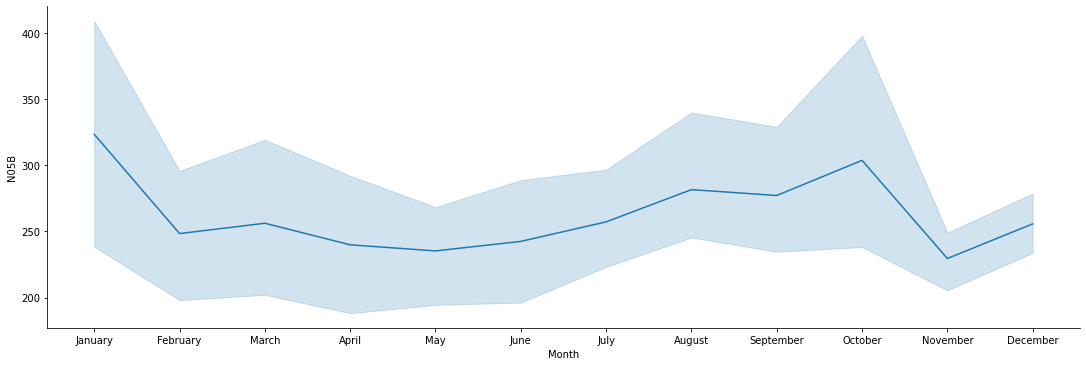

In [20]:
sns.relplot(kind='line', data=df_monthly, x='Month', y='N05B', palette="flare", aspect=3)

* This group of drugs is a drug group that includes the treatment methods used to reduce the symptoms of psychological problems caused by problems related to the problems that we encounter in every stage of life. For this reason, the sales effect of the months could not be seen on the basis of this chart.

### Monthly Sales Figures of N05C Pharmaceutical Category by Years
* **N05C:** - Psycholeptics, Hypnotics and sedatives.

* Anxiety is one of the most common problems in psychiatry. Drugs that provide specific relief of anxiety, also called anxiety, are known as anxiolytics. In the treatment of anxiety, besides psychotherapy applications, anxiolytic drugs are also used. Antidepressant medications are commonly used in the treatment of anxiety disorders.

Source: https://www.antalyapsikiyatri.com/yetiskin-psikolojik-sorunlari/anksiyete-tedavisinde-anksiyolitik-ilaclar

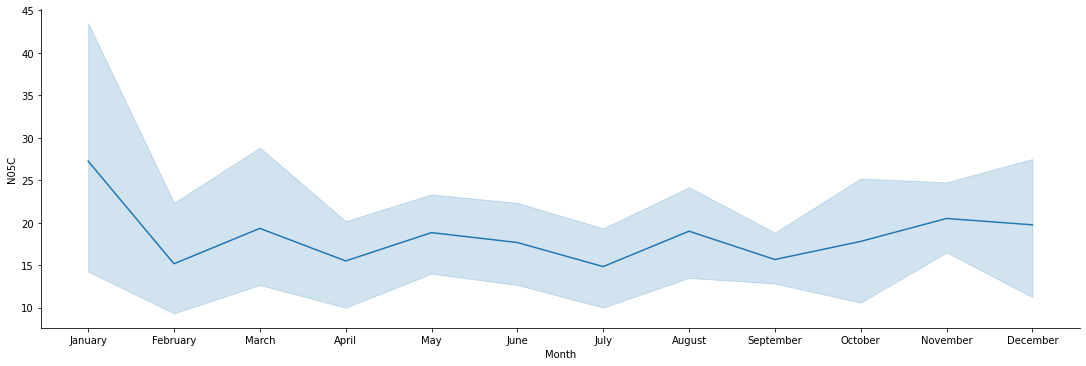

In [21]:
sns.relplot(kind='line', data=df_monthly, x='Month', y='N05C', palette="flare", aspect=3)

* Since the use of this type of drug is independent of the seasons and is used regularly, there is no significant change according to the months.

### Monthly Sales Figures of R03 Pharmaceutical Category by Years

* **RO3:** It is the drug group used for obstructive airway diseases. An example is COPD, a very common disease.

* COPD [Chronic (Chronic) Obstructive (Obstructive) Lung Disease] is a progressive lung disease caused by an inflammation in the airways that is not caused by microbes. According to data from the Global Burden of Disease Study, COPD causes 2.9 million deaths annually. Today, COPD, which has become the third cause of death worldwide, is responsible for 5.5% of all deaths. Respiratory system diseases are the third most common cause of death in Turkey and 61.5% of these deaths are due to COPD. The fact that the society does not have enough information about COPD makes the early diagnosis and effective treatment of the disease difficult.

Source: https://hsgm.saglik.gov.tr/tr/kronik-hava-yolu-hastaliklari/liste/kronik-hava-yolu-hastal%C4%B1klar%C4%B1-koah.html

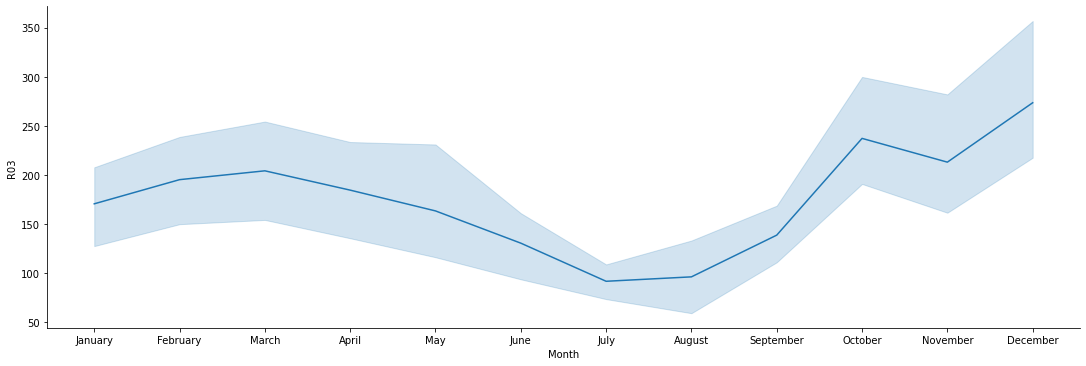

In [22]:
sns.relplot(kind='line', data=df_monthly, x='Month', y='R03', palette="flare", aspect=3)

* Diseases related to the upper respiratory tract increase mostly in autumn, winter and spring. The reason for this is the cumulative sum of mild upper respiratory tract diseases, together with more severe consequences such as Bronchitis, Pneumonia and Asthma etc. predispose to diseases such as For this reason, drug sales increase visibly in these seasons compared to summer months.

### Monthly Sales Figures of R06 Pharmaceutical Category by Years



* **R06:** - Antihistamines drugs for systemic use.

* Antihistamines are substances that prevent the effect of histamine. Histamine is an important chemical agent that occurs when the person encounters the substance to which they are allergic or in cases of inflammation. For best results, these drugs should be taken before allergy symptoms occur.

* The most annoying side effect of antihistamines is "drowsiness". While this can be good when taken at night before going to bed, it can be a nuisance during the day. It can even be harmful at times. These drugs are not recommended for those who drive or operate potentially dangerous machinery. The first doses give the most sleep, the later doses develop some immunity.

Source: https://tr.wikipedia.org/wiki/Antihistaminik

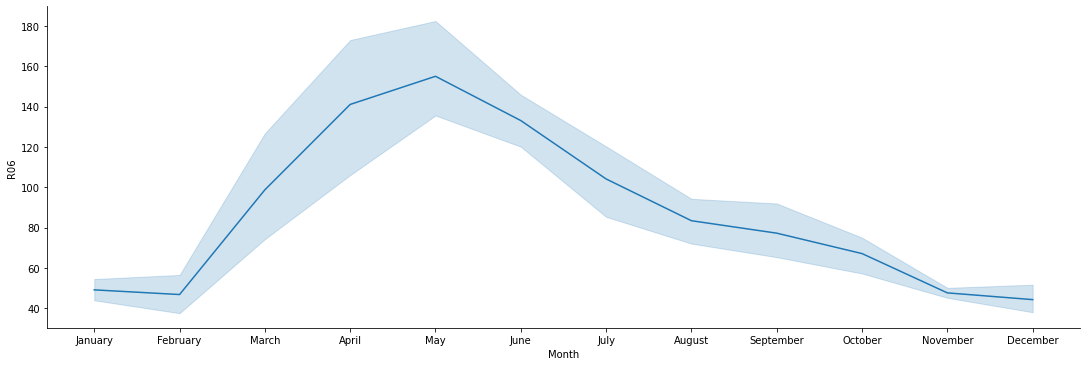

In [23]:
sns.relplot(kind='line', data=df_monthly, x='Month', y='R06', palette="flare", aspect=3)

* If the graph is analyzed, there has been a significant increase in drug sales during the transition period from spring to summer. The main reason for this is pollen, dust, plants and sun etc. The increase in the use of these allergy drugs used against allergies caused by factors.

### Correlation Plot of Numerical Classes

* In this analysis method, we will examine the bilateral relations between classes in general. The best way to do this is to draw a correlation graph. For this reason, we went to create a graph of correlation values ​​via cluster map.



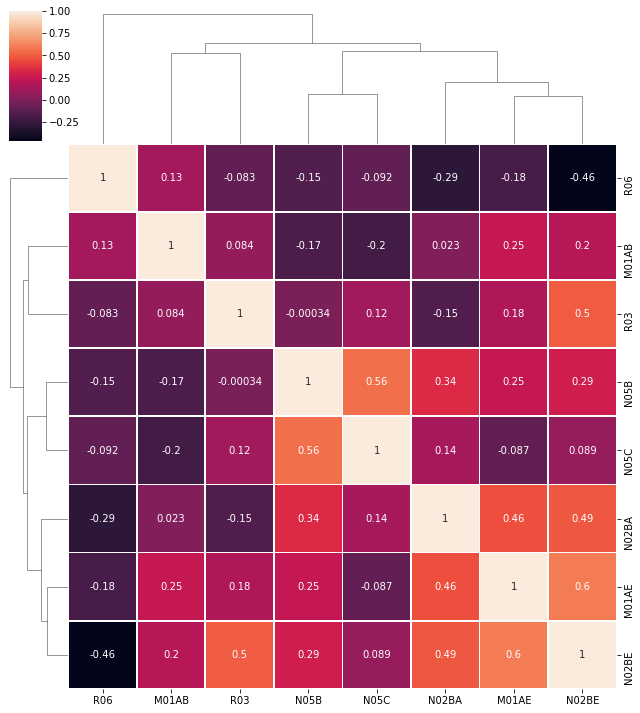

In [24]:
sns.clustermap(df_monthly.corr(), dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = 0.8, figsize = (9, 10))
plt.show()

* First, we'll list the pairs with a remarkable level of similarity:
 * M01AE - N02BE --> 0.6
 * N02BA - N02BE --> 0.49
 * R03 - N02BE --> 0.5
 * R06 - N02BE --> -046
 * N02A - M01AE --> 0.46
 * N05B - ​​N02BA --> 0.34
 * N05B - ​​N05C --> 0.56

* As can be seen above, there are many bilateral relations. The reason for most of this is the similarities in the symptoms of the diseases in which these types of drugs are used. In other words, pharmaceuticals offer solutions for similar purposes with different types of active raw materials.

* However, there is a remarkable relationship that is not related to this situation. For example, there is a positive correlation between allergy medications and drugs used against psychological problems. To show a few as an example;
 * M01AE - N02B Pair, R03 - N02BE Pair, R06 - N02BE, N02A - M01AE.

## Forecasting Future Sales Figures

* Within the scope of this project, a machine learning model named XGBoost was chosen to be used to predict future sales figures. The reason for this is that this model is very powerful in tabular data and can analyze time series data well.

* In this section, we will separate all drug classes according to time information, and then we will train with a data set that we use sales figures for this time information, and the XGBoost Regression model in the XGBoost library. Through this model, we will make a prediction about the year 2019, which we have chosen as the test data from our data set, and compare it with the real results on the chart.

### Future Sales Forecast for M01AB Class



In [25]:
df = pd.read_csv("salesweekly.csv", index_col=[0], parse_dates=[0])
df = df.drop(['M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06'], axis = 1)
# Outliers found will be discarded from our dataset.
df = df.drop(detect_outliers(df,["M01AB"]),axis=0)

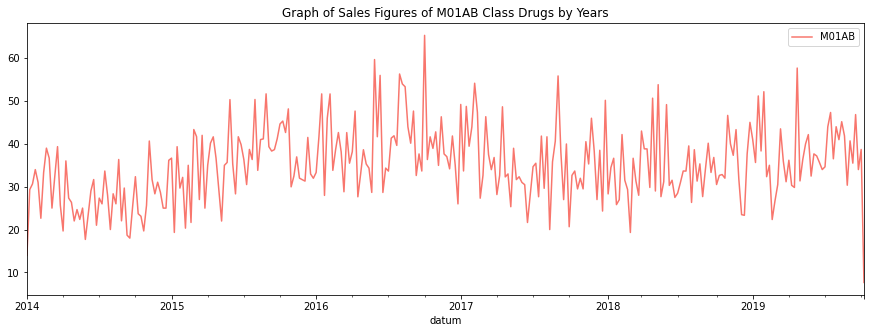

In [26]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = df.plot(style='-', figsize=(15,5), color=color_pal[0], title='Graph of Sales Figures of M01AB Class Drugs by Years')

In [27]:
split_date = '01-Jan-2019'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

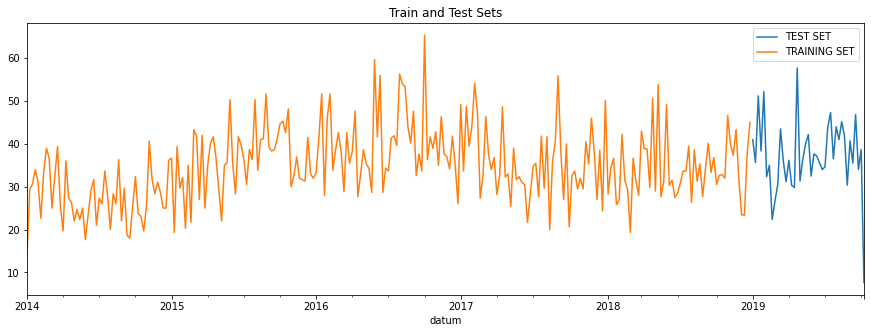

In [28]:
_ = df_test \
    .rename(columns={'M01AB': 'TEST SET'}) \
    .join(df_train.rename(columns={'M01AB': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Train and Test Sets', style='-')

In [29]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['quarter','month','year',
           ]]
    if label:
        y = df[label]
        return X, y
    return X

In [30]:
X_train, y_train = create_features(df_train, label='M01AB')
X_test, y_test = create_features(df_test, label='M01AB')

In [31]:
X_train.head()

,quarter,month,year
datum,,,
2014-01-05,1,1,2014
2014-01-12,1,1,2014
2014-01-19,1,1,2014
2014-01-26,1,1,2014
2014-02-02,1,2,2014


In [32]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

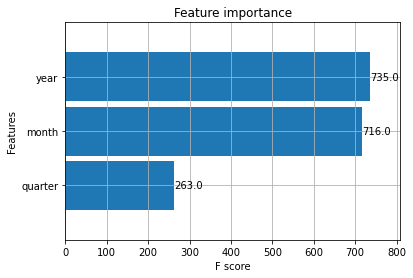

In [33]:
_ = plot_importance(reg, height=0.9)

In [34]:
df_test['M01AB_Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)

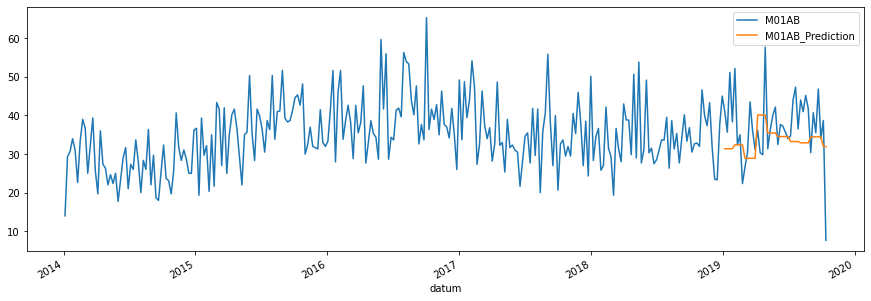

In [35]:
_ = df_all[['M01AB','M01AB_Prediction']].plot(figsize=(15, 5))

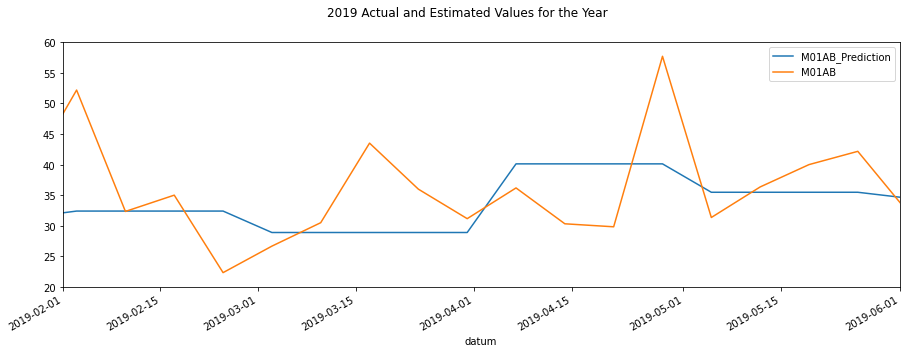

In [36]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['M01AB_Prediction','M01AB']].plot(ax=ax,
                                              style=['-','-'])
ax.set_xbound(lower='02-01-2019', upper='06-01-2019')
ax.set_ylim(20, 60)
plot = plt.suptitle('2019 Actual and Estimated Values ​​for the Year')

### 

### Future Sales Forecast for M01AE Class

In [37]:
df = pd.read_csv("salesmonthly.csv", index_col=[0], parse_dates=[0])
df = df.drop(['M01AB','N02BA','N02BE', 'N05B','N05C','R03','R06'], axis = 1)
#df = df.drop(detect_outliers(df,["M01AE"]),axis=0)

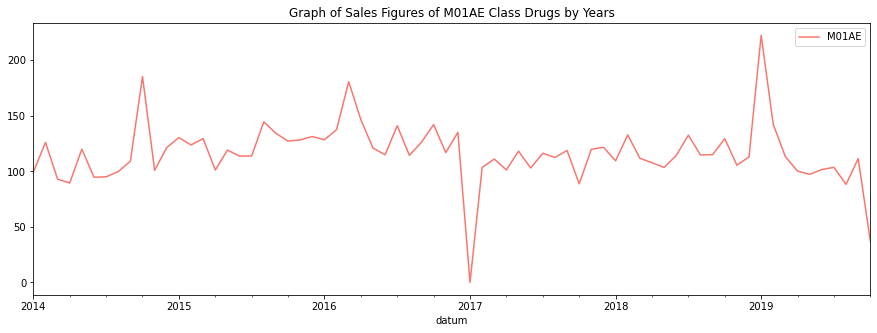

In [38]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = df.plot(style='-', figsize=(15,5), color=color_pal[0], title='Graph of Sales Figures of M01AE Class Drugs by Years')

In [39]:
split_date = '01-Jan-2019'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

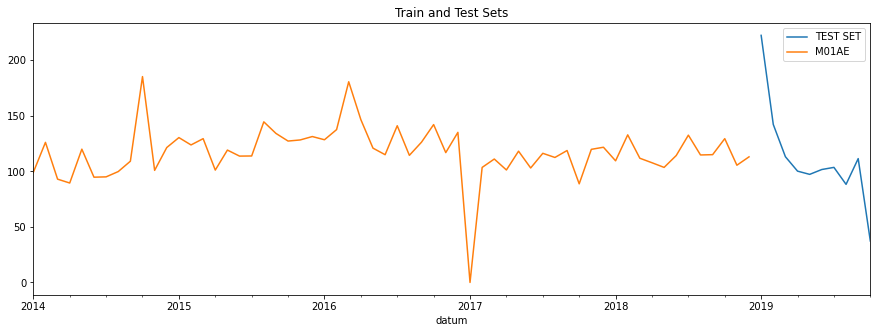

In [40]:
_ = df_test \
    .rename(columns={'M01AE': 'TEST SET'}) \
    .join(df_train.rename(columns={'M01AB': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Train and Test Sets', style='-')

In [41]:
X_train, y_train = create_features(df_train, label='M01AE')
X_test, y_test = create_features(df_test, label='M01AE')

In [42]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

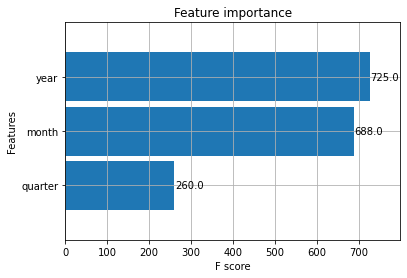

In [43]:
_ = plot_importance(reg, height=0.9)

In [44]:
df_test['M01AE_Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)

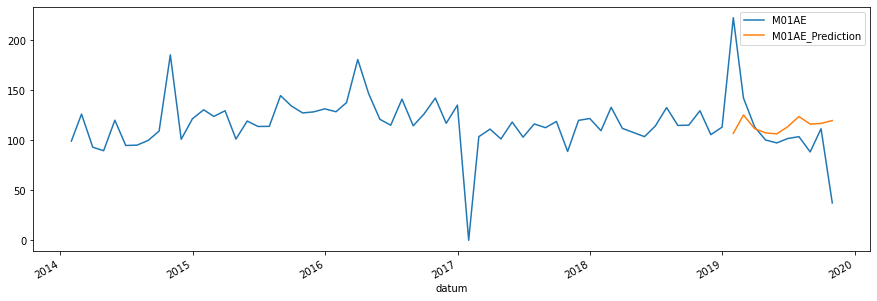

In [45]:
_ = df_all[['M01AE','M01AE_Prediction']].plot(figsize=(15, 5))

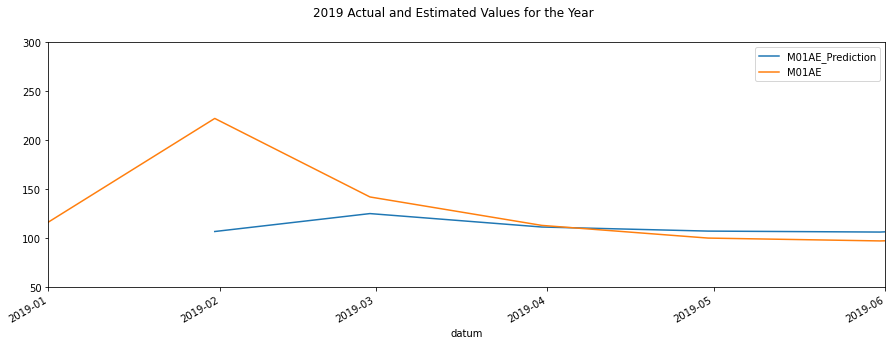

In [46]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['M01AE_Prediction','M01AE']].plot(ax=ax,
                                              style=['-','-'])
ax.set_xbound(lower='01-01-2019', upper='06-01-2019')
ax.set_ylim(50, 300)
plot = plt.suptitle('2019 Actual and Estimated Values ​​for the Year')

### Future Sales Forecast for the N02BA Class

In [47]:
df = pd.read_csv("salesmonthly.csv", index_col=[0], parse_dates=[0])
df = df.drop(['M01AB','M01AE','N02BE', 'N05B','N05C','R03','R06'], axis = 1)

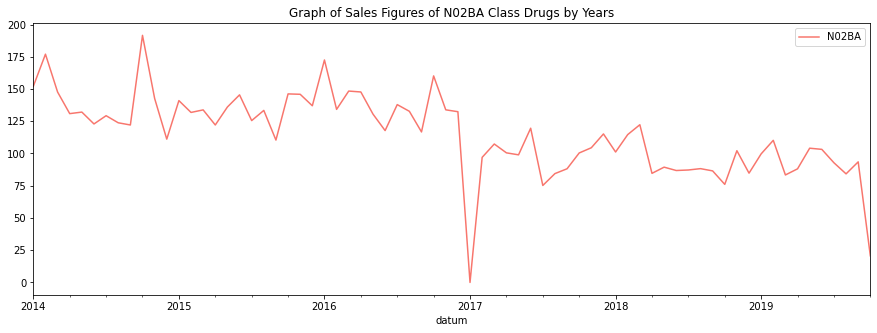

In [48]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = df.plot(style='-', figsize=(15,5), color=color_pal[0], title='Graph of Sales Figures of N02BA Class Drugs by Years')

In [49]:
split_date = '01-Jan-2019'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

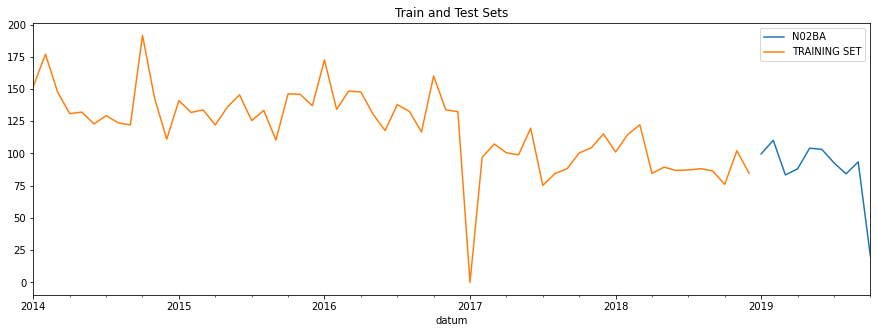

In [50]:
_ = df_test \
    .rename(columns={'M01AE': 'TEST SET'}) \
    .join(df_train.rename(columns={'N02BA': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Train and Test Sets', style='-')

In [51]:
X_train, y_train = create_features(df_train, label='N02BA')
X_test, y_test = create_features(df_test, label='N02BA')

In [52]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

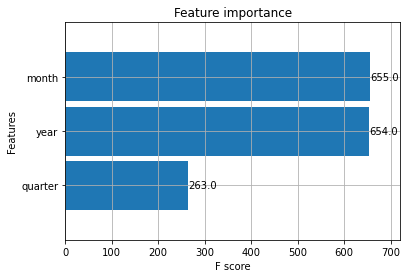

In [53]:
_ = plot_importance(reg, height=0.9)

In [54]:
df_test['N02BA_Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)

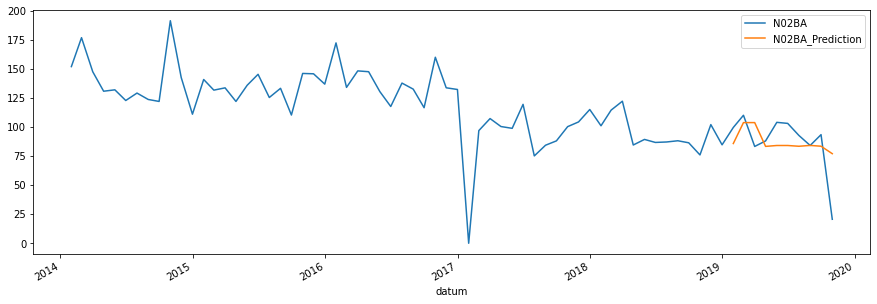

In [55]:
_ = df_all[['N02BA','N02BA_Prediction']].plot(figsize=(15, 5))

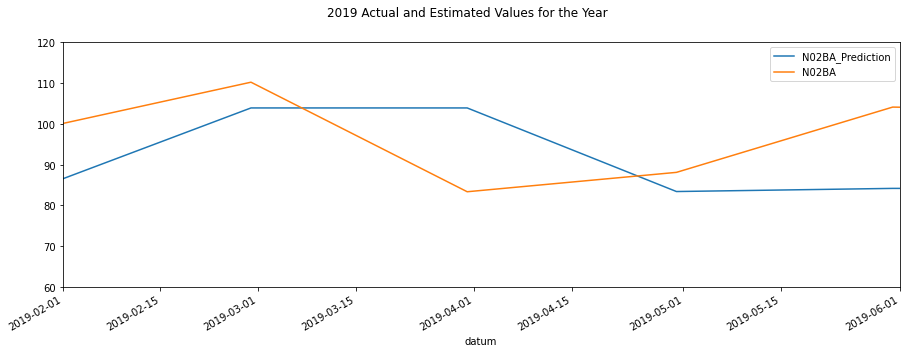

In [56]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['N02BA_Prediction','N02BA']].plot(ax=ax,
                                              style=['-','-'])
ax.set_xbound(lower='02-01-2019', upper='06-01-2019')
ax.set_ylim(60, 120)
plot = plt.suptitle('2019 Actual and Estimated Values ​​for the Year')

### Future Sales Forecast for the N02BE Class

In [57]:
df = pd.read_csv("salesmonthly.csv", index_col=[0], parse_dates=[0])
df = df.drop(['M01AB','M01AE','N02BA', 'N05B','N05C','R03','R06'], axis = 1)

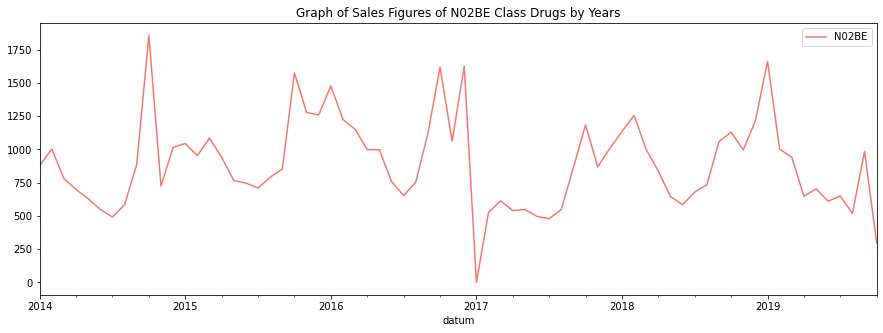

In [58]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = df.plot(style='-', figsize=(15,5), color=color_pal[0], title='Graph of Sales Figures of N02BE Class Drugs by Years')

In [59]:
split_date = '01-Jan-2019'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

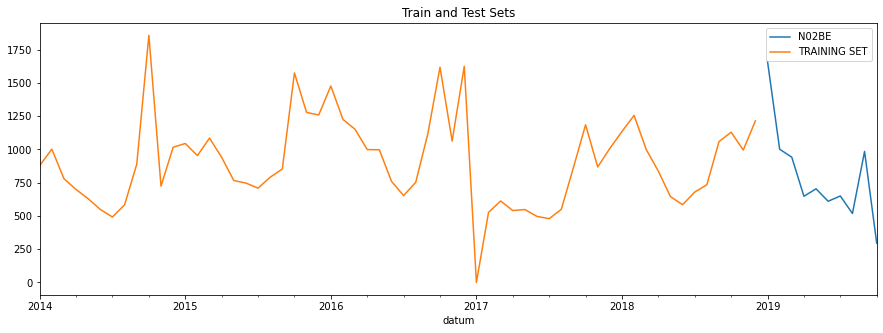

In [60]:
_ = df_test \
    .rename(columns={'M01AE': 'TEST SET'}) \
    .join(df_train.rename(columns={'N02BE': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Train and Test Sets', style='-')

In [61]:
X_train, y_train = create_features(df_train, label='N02BE')
X_test, y_test = create_features(df_test, label='N02BE')

In [62]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

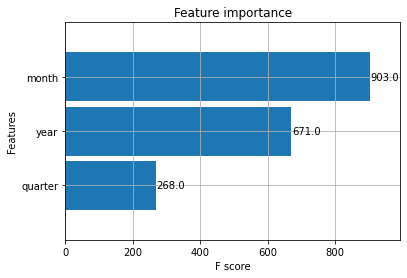

In [63]:
_ = plot_importance(reg, height=0.9)

In [64]:
df_test['N02BE_Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)

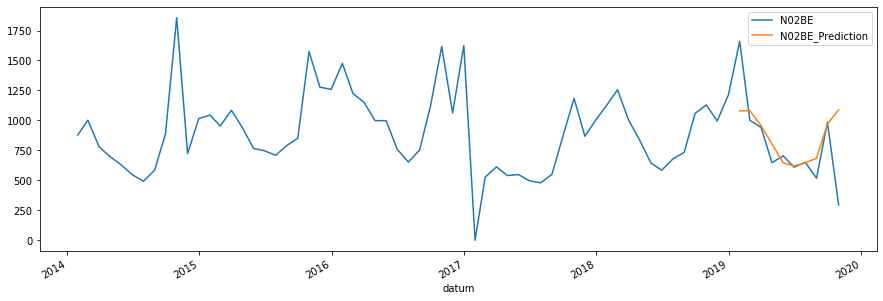

In [65]:
_ = df_all[['N02BE','N02BE_Prediction']].plot(figsize=(15, 5))

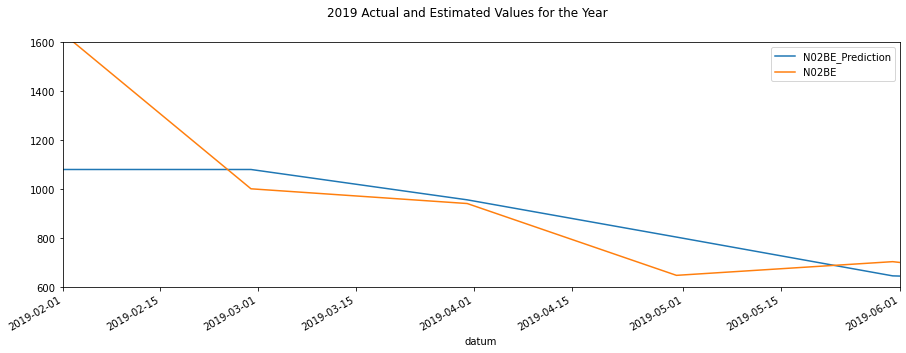

In [66]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['N02BE_Prediction','N02BE']].plot(ax=ax,
                                              style=['-','-'])
ax.set_xbound(lower='02-01-2019', upper='06-01-2019')
ax.set_ylim(600, 1600)
plot = plt.suptitle('2019 Actual and Estimated Values ​​for the Year')

### Future Sales Forecast for Class N05B

In [67]:
df = pd.read_csv("salesmonthly.csv", index_col=[0], parse_dates=[0])
df = df.drop(['M01AB','M01AE','N02BA', 'N02BE','N05C','R03','R06'], axis = 1)

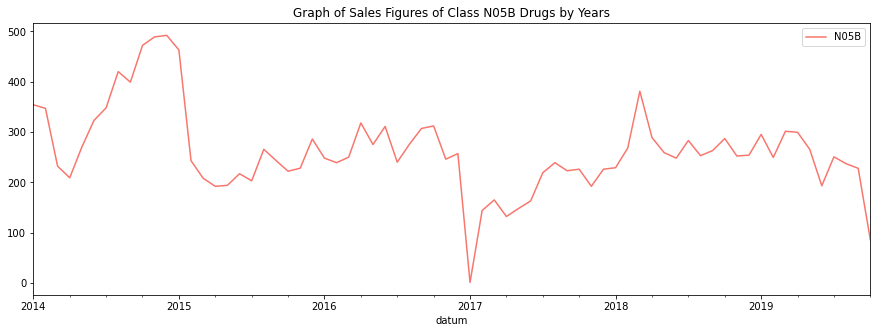

In [68]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = df.plot(style='-', figsize=(15,5), color=color_pal[0], title='Graph of Sales Figures of Class N05B Drugs by Years')

In [69]:
split_date = '01-Jan-2019'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

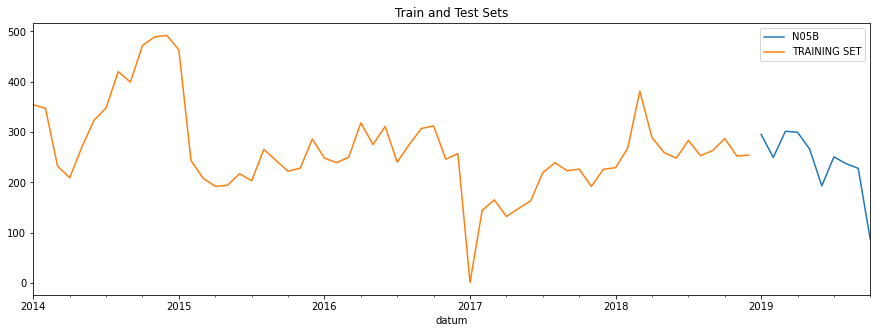

In [70]:
_ = df_test \
    .rename(columns={'M01AE': 'TEST SET'}) \
    .join(df_train.rename(columns={'N05B': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Train and Test Sets', style='-')

In [71]:
X_train, y_train = create_features(df_train, label='N05B')
X_test, y_test = create_features(df_test, label='N05B')

In [72]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

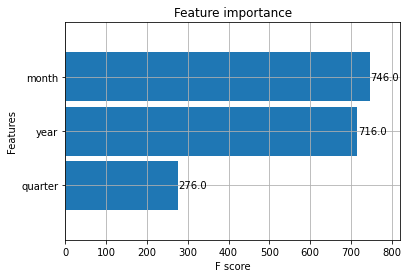

In [73]:
_ = plot_importance(reg, height=0.9)

In [74]:
df_test['N05B_Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)

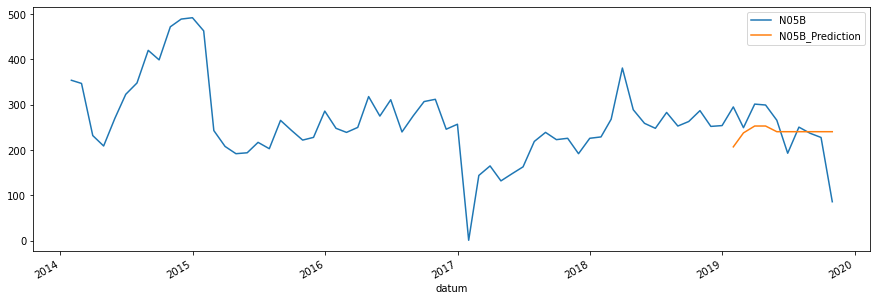

In [75]:
_ = df_all[['N05B','N05B_Prediction']].plot(figsize=(15, 5))

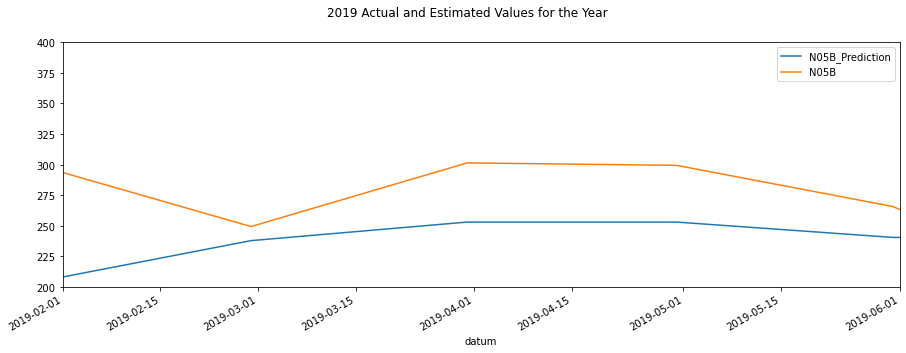

In [76]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['N05B_Prediction','N05B']].plot(ax=ax,
                                              style=['-','-'])
ax.set_xbound(lower='02-01-2019', upper='06-01-2019')
ax.set_ylim(200, 400)
plot = plt.suptitle('2019 Actual and Estimated Values ​​for the Year')

### Future Sales Forecast for the N05C Class

In [77]:
df = pd.read_csv("salesmonthly.csv", index_col=[0], parse_dates=[0])
df = df.drop(['M01AB','M01AE','N02BA', 'N02BE','N05B','R03','R06'], axis = 1)

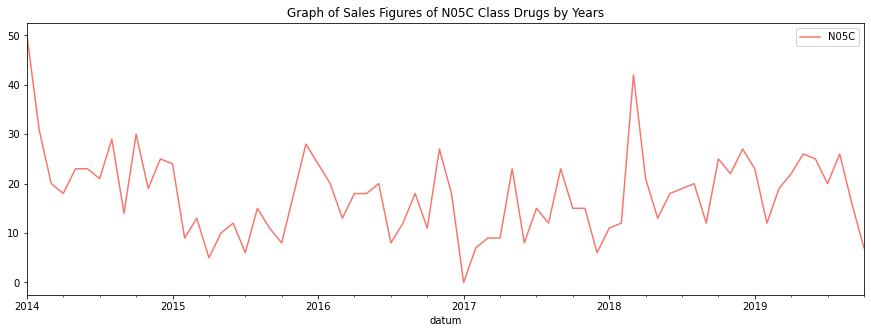

In [78]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = df.plot(style='-', figsize=(15,5), color=color_pal[0], title='Graph of Sales Figures of N05C Class Drugs by Years')

In [79]:
split_date = '01-Jan-2019'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

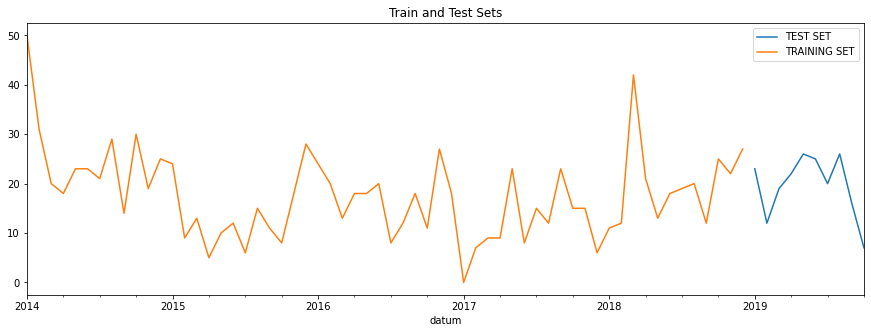

In [80]:
_ = df_test \
    .rename(columns={'N05C': 'TEST SET'}) \
    .join(df_train.rename(columns={'N05C': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Train and Test Sets', style='-')

In [81]:
X_train, y_train = create_features(df_train, label='N05C')
X_test, y_test = create_features(df_test, label='N05C')

In [82]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

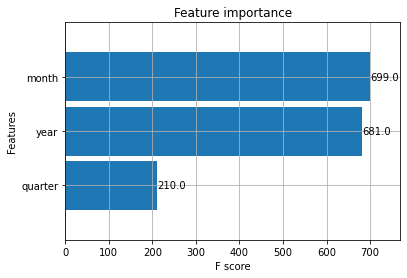

In [83]:
_ = plot_importance(reg, height=0.9)

In [84]:
df_test['N05C_Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)

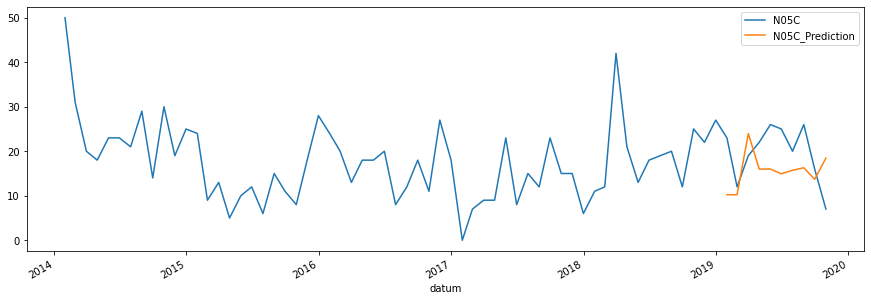

In [85]:
_ = df_all[['N05C','N05C_Prediction']].plot(figsize=(15, 5))

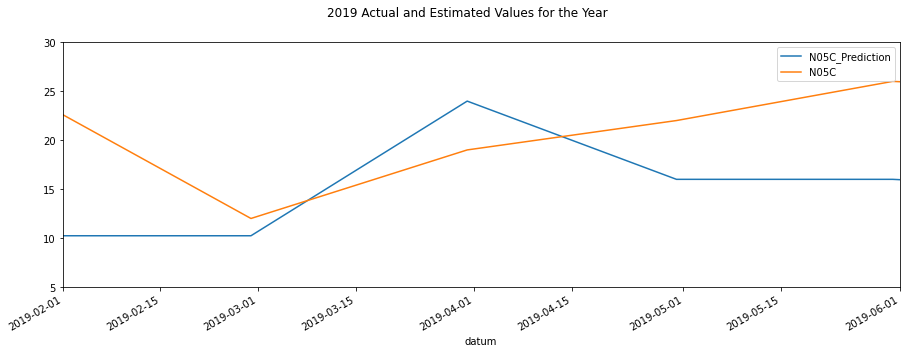

In [86]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['N05C_Prediction','N05C']].plot(ax=ax,
                                              style=['-','-'])
ax.set_xbound(lower='02-01-2019', upper='06-01-2019')
ax.set_ylim(5, 30)
plot = plt.suptitle('2019 Actual and Estimated Values ​​for the Year')

### Future Sales Forecast for R03 Class

In [87]:
df = pd.read_csv("salesmonthly.csv", index_col=[0], parse_dates=[0])
df = df.drop(['M01AB','M01AE','N02BA', 'N02BE','N05B','N05C','R06'], axis = 1)

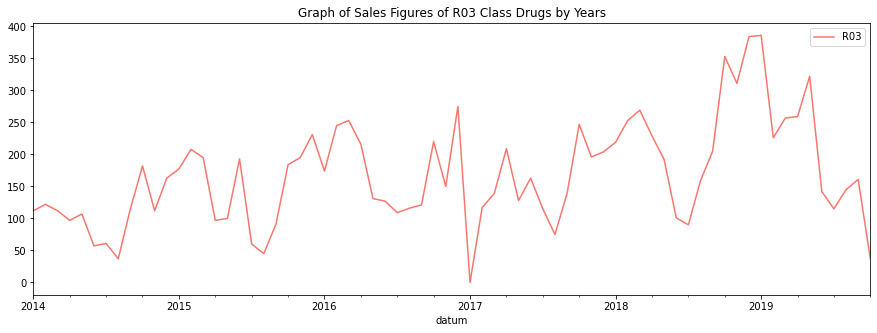

In [88]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = df.plot(style='-', figsize=(15,5), color=color_pal[0], title='Graph of Sales Figures of R03 Class Drugs by Years')

In [89]:
split_date = '01-Jan-2019'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

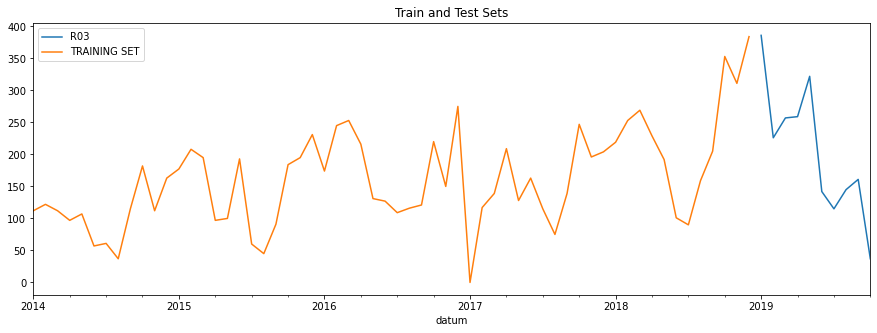

In [90]:
_ = df_test \
    .rename(columns={'N05C': 'TEST SET'}) \
    .join(df_train.rename(columns={'R03': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Train and Test Sets', style='-')

In [91]:
X_train, y_train = create_features(df_train, label='R03')
X_test, y_test = create_features(df_test, label='R03')

In [92]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

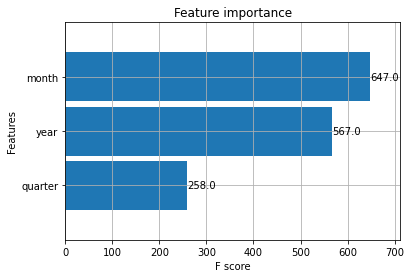

In [93]:
_ = plot_importance(reg, height=0.9)

In [94]:
df_test['R03_Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)

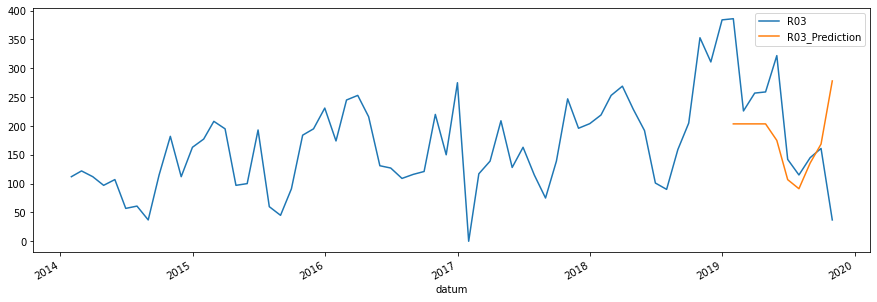

In [95]:
_ = df_all[['R03','R03_Prediction']].plot(figsize=(15, 5))

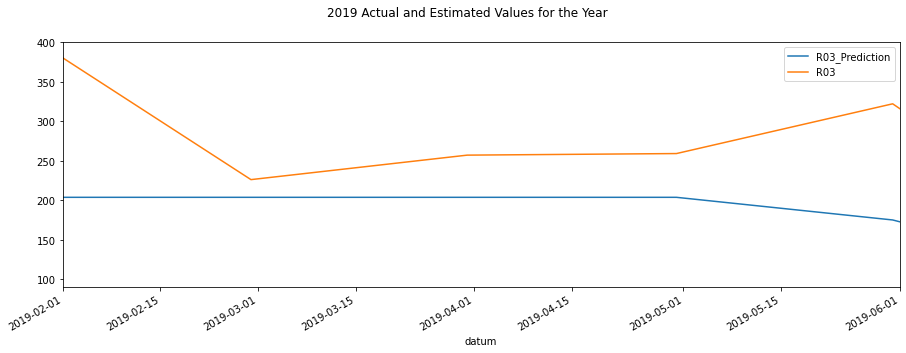

In [96]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['R03_Prediction','R03']].plot(ax=ax,
                                              style=['-','-'])
ax.set_xbound(lower='02-01-2019', upper='06-01-2019')
ax.set_ylim(90, 400)
plot = plt.suptitle('2019 Actual and Estimated Values ​​for the Year')

### Future Sales Forecast for R06 Class

In [97]:
df = pd.read_csv("salesmonthly.csv", index_col=[0], parse_dates=[0])
df = df.drop(['M01AB','M01AE','N02BA', 'N02BE','N05B','N05C','R03'], axis = 1)

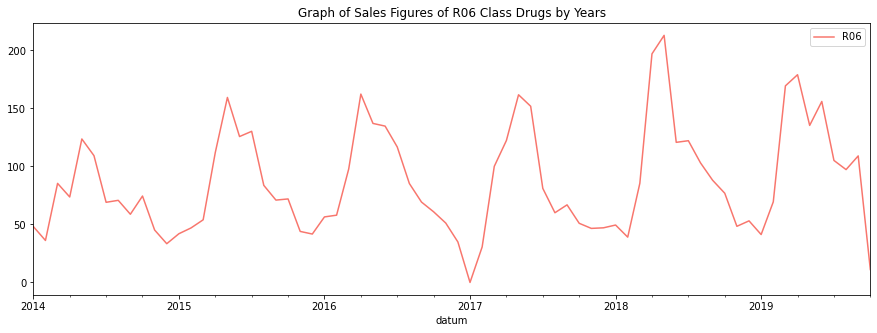

In [98]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = df.plot(style='-', figsize=(15,5), color=color_pal[0], title='Graph of Sales Figures of R06 Class Drugs by Years')

In [99]:
split_date = '01-Jan-2019'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

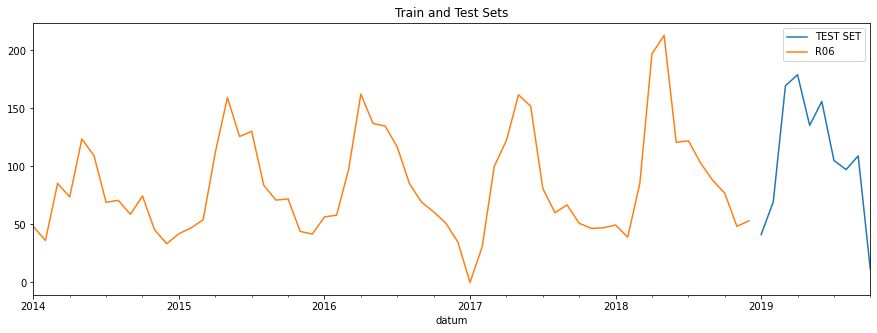

In [100]:
_ = df_test \
    .rename(columns={'R06': 'TEST SET'}) \
    .join(df_train.rename(columns={'R03': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Train and Test Sets', style='-')

In [101]:
X_train, y_train = create_features(df_train, label='R06')
X_test, y_test = create_features(df_test, label='R06')

In [102]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

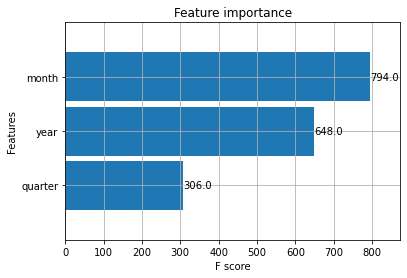

In [103]:
_ = plot_importance(reg, height=0.9)

In [104]:
df_test['R06_Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)

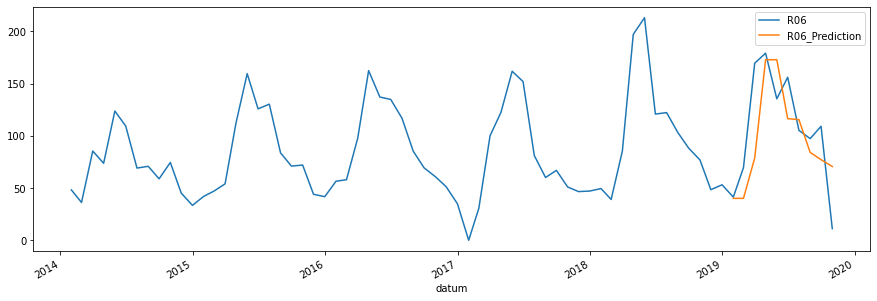

In [105]:
_ = df_all[['R06','R06_Prediction']].plot(figsize=(15, 5))

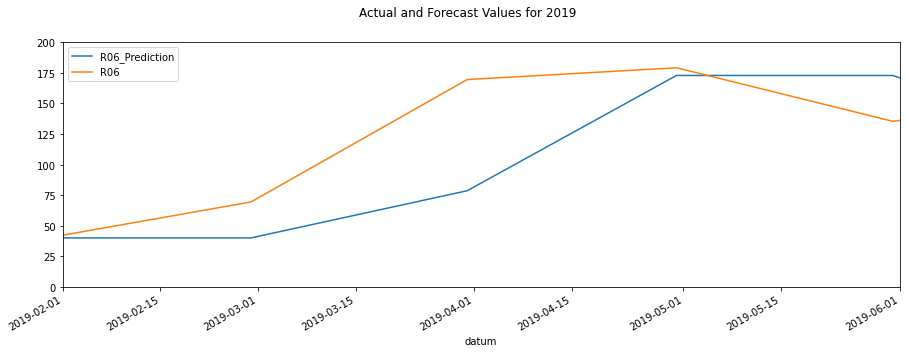

In [106]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['R06_Prediction','R06']].plot(ax=ax,
                                              style=['-','-'])
ax.set_xbound(lower='02-01-2019', upper='06-01-2019')
ax.set_ylim(0, 200)
plot = plt.suptitle('Actual and Forecast Values ​​for 2019')